In [1]:
#导入模块
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from pandas import DataFrame,Series
from  matplotlib import ticker 
import seaborn as sns 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
#整理数据
hero = pd.read_csv("champs.csv")

In [3]:
stats1 = pd.read_csv("stats1.csv")
stats2 = pd.read_csv("stats2.csv")

C:\Users\lly\AppData\Local\Temp\ipykernel_34556\3234408425.py:2: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  stats2 = pd.read_csv("stats2.csv")


In [4]:
stats = pd.concat([stats1,stats2])

In [5]:
particp = pd.read_csv("participants.csv")

In [6]:
ban_info = pd.read_csv("teambans.csv")

In [7]:
matches = pd.read_csv("matches.csv")

In [8]:
teamstats = pd.read_csv("teamstats.csv")

In [9]:
df = stats.merge(particp,how="left")

In [10]:
df = df.merge(matches,left_on='matchid',right_on="id",how="left")

In [11]:
df = df.merge(hero,left_on='championid',right_on="id")

In [12]:
#处理下路bottom位置分类
def get_position(x):
    if x["role"] == "DUO_SUPPORT":
        return "ADC"
    elif x["role"] == "DUO_CARRY":
        return "SUP"
    else:
        return x["position"]

df["position"] = df.apply(get_position,axis=1)

    数据来源于欧服包括S7,S8,S6的对局情况，主要还是S8赛季的对局情况。

In [13]:
#ban英雄数据
ban = ban_info.merge(hero,right_on='id',left_on="championid",how="left")


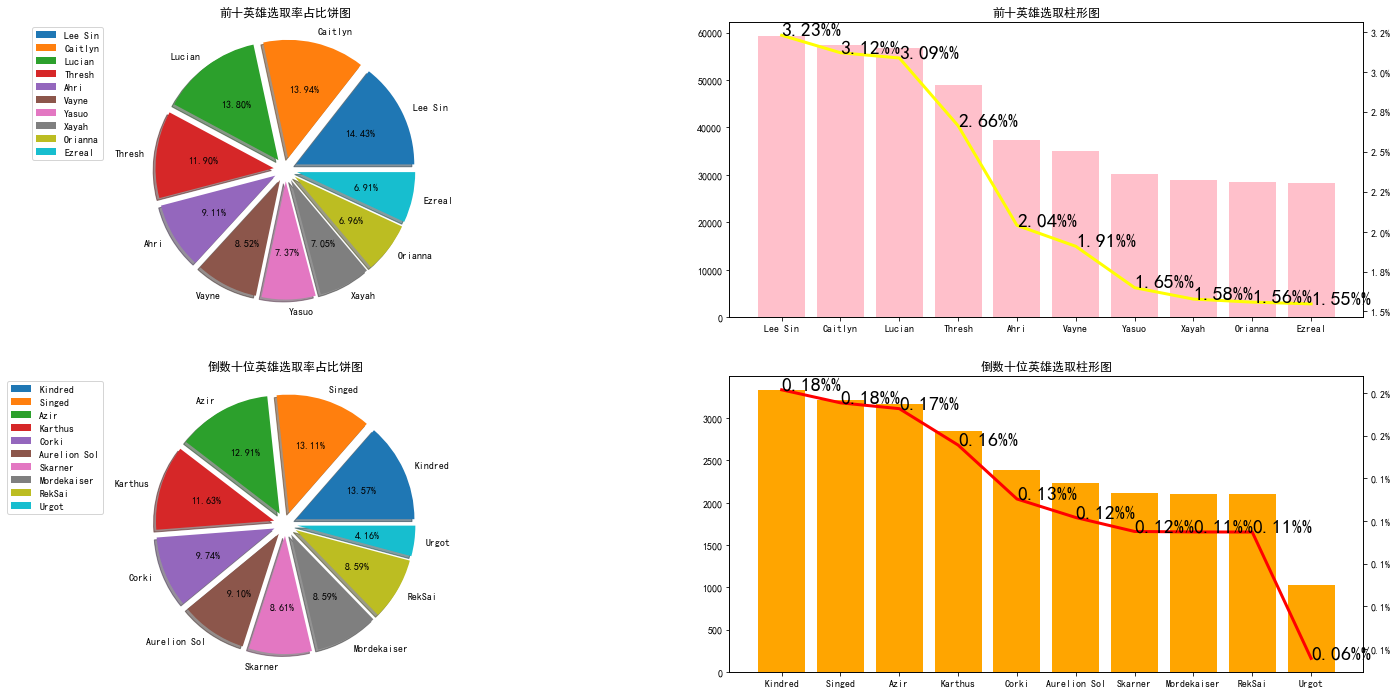

In [14]:
#前十英雄选取率
hero_index = df["name"].value_counts().sort_values(ascending=False)[:10].index
hero_values = df["name"].value_counts().sort_values(ascending=False)[:10].values
#倒数英雄选取率
hero_index2 = df["name"].value_counts().sort_values(ascending=False)[-10:].index
hero_values2 = df["name"].value_counts().sort_values(ascending=False)[-10:].values

plt.figure(figsize=(25,25))
plt.subplot(4,2,1)
plt.title("前十英雄选取率占比饼图")
hero_ten = plt.pie(hero_values,labels=hero_index,shadow=True,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct="%.2f%%")
plt.legend(loc='best', bbox_to_anchor=(-0.1, 1),fontsize=10)
plt.subplot(4,2,3)
plt.title("倒数十位英雄选取率占比饼图")
hero_ten = plt.pie(hero_values2,labels=hero_index2,shadow=True,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct="%.2f%%")
plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 1),fontsize=10)
ax1 =plt.subplot(4,2,2)
plt.title("前十英雄选取柱形图")
ax1.bar(hero_index,hero_values,color=["pink"])
ax2 = ax1.twinx()
ax2.plot(hero_index,hero_values/df["name"].count(),color='yellow',linewidth=3)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
for i,(x,y) in enumerate(zip(hero_index,hero_values/df["name"].count())):  
    ax2.text(x,y,str(round((hero_values/df["name"].count())[i]*100,2))+"%%",color='black',fontsize=20)
ax3 = plt.subplot(4,2,4)
plt.title("倒数十位英雄选取柱形图")
ax3.bar(hero_index2,hero_values2,color=["orange"])
ax4 = ax3.twinx()
ax4.plot(hero_index2,hero_values2/df["name"].count(),color='red',linewidth=3)
ax4.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
for i,(x,y) in enumerate(zip(hero_index2,hero_values2/df["name"].count())):  
    ax4.text(x,y,str(round((hero_values2/df["name"].count())[i]*100,2))+"%%",color='black',fontsize=20)

In [15]:
avg_cha = (sum(hero_values) - sum(hero_values2))/10
avg_cha

38621.4

        可以看到在全部赛季下，盲僧的选取率是最高的占全部的(3.23%),其次是凯瑟琳(3.12%),然后是卢锡安(3.09%),其中前十AD位置占了四个，只有锤石一个辅助进了前十(2.66%),主要都是操作性英雄比较收到大家的喜爱，是不是版本英雄还得看胜率如何，选取率排名垫底是吸血鬼(0.18%)，辛吉德(0.18%)，沙漠皇(0.17%)，最后几名是雷克塞(0.11%)、厄加特(%0.06)，外形因素可能占了比较大的因素。前十和后十选取数相差巨大，平均每个差距为38621，说明需要对个别英雄进行调整。

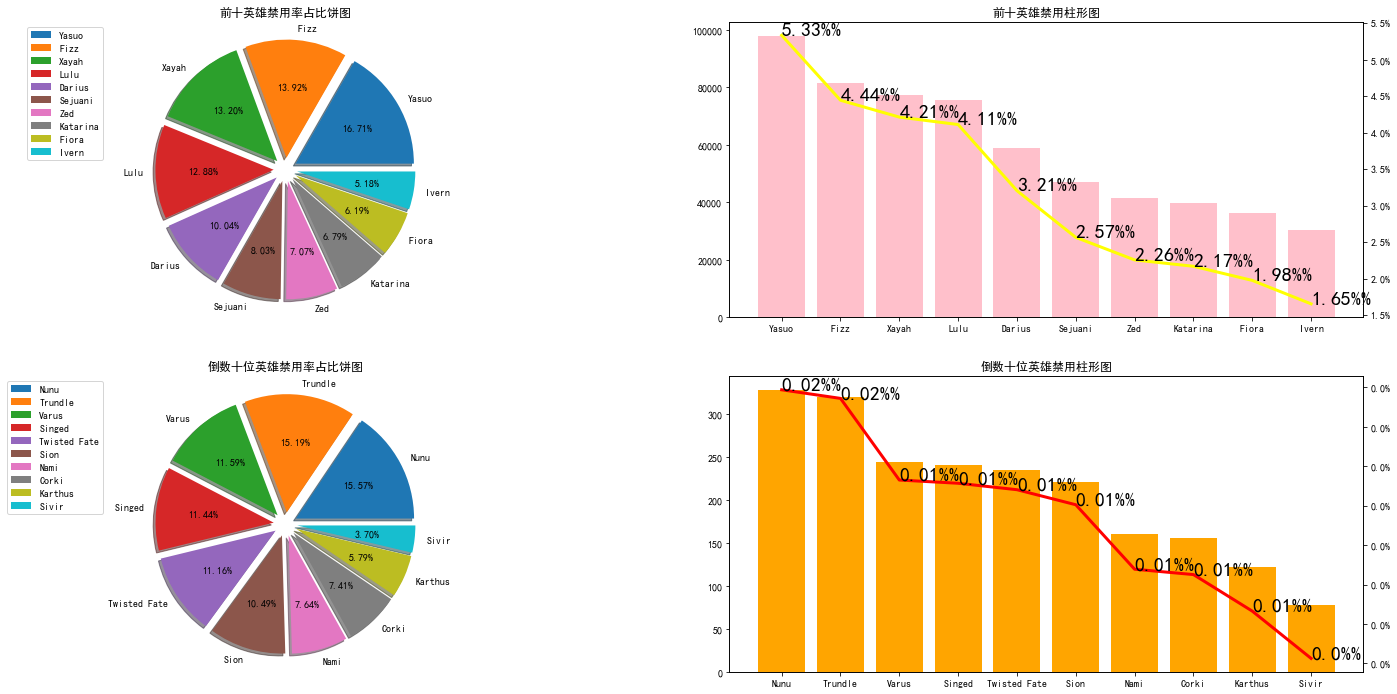

In [16]:
#英雄禁用率分析

#前十英雄禁用率
hero_index = ban["name"].value_counts().sort_values(ascending=False)[:10].index
hero_values = ban["name"].value_counts().sort_values(ascending=False)[:10].values
#倒数英雄选取率
hero_index2 = ban["name"].value_counts().sort_values(ascending=False)[-10:].index
hero_values2 = ban["name"].value_counts().sort_values(ascending=False)[-10:].values

plt.figure(figsize=(25,25))
plt.subplot(4,2,1)
plt.title("前十英雄禁用率占比饼图")
hero_ten = plt.pie(hero_values,labels=hero_index,shadow=True,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct="%.2f%%")
plt.legend(loc='best', bbox_to_anchor=(-0.1, 1),fontsize=10)
plt.subplot(4,2,3)
plt.title("倒数十位英雄禁用率占比饼图")
hero_ten = plt.pie(hero_values2,labels=hero_index2,shadow=True,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct="%.2f%%")
plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 1),fontsize=10)
ax1 =plt.subplot(4,2,2)
plt.title("前十英雄禁用柱形图")
ax1.bar(hero_index,hero_values,color=["pink"])
ax2 = ax1.twinx()
ax2.plot(hero_index,hero_values/df["name"].count(),color='yellow',linewidth=3)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
for i,(x,y) in enumerate(zip(hero_index,hero_values/df["name"].count())):  
    ax2.text(x,y,str(round((hero_values/df["name"].count())[i]*100,2))+"%%",color='black',fontsize=20)
ax3 = plt.subplot(4,2,4)
plt.title("倒数十位英雄禁用柱形图")
ax3.bar(hero_index2,hero_values2,color=["orange"])
ax4 = ax3.twinx()
ax4.plot(hero_index2,hero_values2/df["name"].count(),color='red',linewidth=3)
ax4.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
for i,(x,y) in enumerate(zip(hero_index2,hero_values2/df["name"].count())):  
    ax4.text(x,y,str(round((hero_values2/df["name"].count())[i]*100,2))+"%%",color='black',fontsize=20)

        反观英雄禁用率，亚索的禁用率是最高的(5.33%)接近十万的禁用数,其次是菲兹高达(4.44%),后面是霞(4.21%),以及辅助位上的露露(4.11%),禁用率最低的英雄差距不大都在0.01%起伏误差为0.01%。通过禁用率和选取率的分析可以找出版本热门的人气英雄。

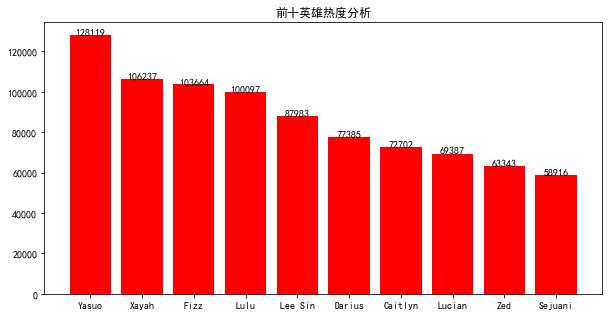

In [17]:
#热度分析
redu_info = (ban["name"].value_counts() +  df["name"].value_counts()).sort_values(ascending=False)[:10]
redu_info.dropna(inplace=True)
redu_index = redu_info.index
redu_values = redu_info.values
plt.figure(figsize=(10,5))
plt.bar(redu_index,redu_values,color="red")
plt.title("前十英雄热度分析")
for x,y in zip(redu_index,redu_values):
    plt.text(x,y,y,color="black",fontsize=10,ha="center")

        发现亚索的热度最高为128119,果然是人气王，霞的热度排名第二为106237,李青的热度第三87983，没想到拳头的亲儿子伊泽瑞尔居然排名第十，这是欧服的热度排名
  

In [18]:
#分析英雄胜率以及 KDA
new_df = df.groupby(by="name").agg({"name":"count","win":"sum","kills":"mean","deaths":"mean","assists":"mean"})
#设置新列名
new_df.columns = ["match_count","win_count","K","D","A"]
#计算英雄胜率
new_df["win_rate %"] = new_df["win_count"]/new_df["match_count"]*100 -50.0
#计算英雄kda
new_df["KDA"] = (new_df["K"]+new_df["A"])/new_df["D"]
new_df = new_df.round(2)
#添加英雄热度
new_df["choose_rate %"] = new_df["match_count"]/df["name"].count() * 100 
new_df["choose_rate %"] = new_df["choose_rate %"] + ban["name"].value_counts()/ban["name"].count()*100
#设置小数位数
new_df = new_df.round(2)
#按照胜率进行排序
new_df = new_df.sort_values("win_rate %",ascending=False)
#重新设置索引
new_df.reset_index(inplace=True)
new_df

,name,match_count,win_count,K,D,A,win_rate %,KDA,choose_rate %
0,Ivern,8194,4578,2.61,4.09,12.98,5.87,3.81,3.21
1,Anivia,7785,4194,6.23,4.66,7.39,3.87,2.92,0.54
2,Xerath,6273,3357,7.09,5.34,8.36,3.52,2.89,0.38
3,Sona,14090,7529,2.93,5.57,13.52,3.44,2.95,0.80
4,Ahri,37423,19949,7.08,5.43,7.51,3.31,2.69,3.93
...,...,...,...,...,...,...,...,...,...
131,Rakan,21616,9946,1.46,5.46,13.85,-3.99,2.80,2.90
132,Rengar,8121,3706,6.87,6.51,6.20,-4.37,2.01,0.96
133,Ezreal,28397,12951,6.59,5.39,7.85,-4.39,2.68,1.64
134,Azir,3166,1391,5.77,6.57,6.47,-6.06,1.86,0.27


,name,match_count,win_count,K,D,A,win_rate %,KDA,choose_rate %
0,Ivern,8194,4578,2.61,4.09,12.98,5.87,3.81,3.21
1,Anivia,7785,4194,6.23,4.66,7.39,3.87,2.92,0.54
2,Xerath,6273,3357,7.09,5.34,8.36,3.52,2.89,0.38
3,Sona,14090,7529,2.93,5.57,13.52,3.44,2.95,0.80
4,Ahri,37423,19949,7.08,5.43,7.51,3.31,2.69,3.93
5,Janna,24296,12856,0.86,3.94,14.15,2.91,3.81,1.40
6,Skarner,2111,1116,4.71,4.95,8.95,2.87,2.76,0.16
7,Pantheon,11305,5934,7.87,6.31,6.63,2.49,2.30,0.95
8,Amumu,13584,7118,4.59,5.30,10.65,2.40,2.88,1.21
9,Draven,20327,10633,7.62,6.41,6.30,2.31,2.17,1.63


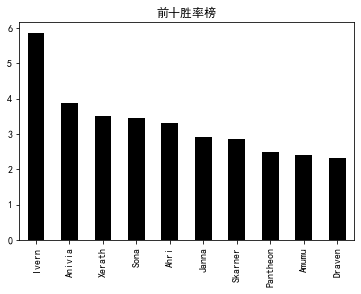

In [19]:
#在百分之50的基础上 前十胜率
(new_df[:10]["win_rate %"]).plot(kind="bar",color="black")
k = plt.xticks(new_df[:10].index,labels=new_df[:10]["name"])
plt.title("前十胜率榜")
new_df[:10]

        胜率最高的居然是艾翁这个英雄高达（55.87%)，其次是凤凰(53.87%),排在第三的是艾泽拉斯炮王(53.52%),第四是辅助位的娑娜(53.44%),第五位是阿狸(53.44%)，中单法师和辅助占了前十大部分位置各占了三位，AD只有德莱文进了前十（52.31%）

,name,match_count,win_count,K,D,A,win_rate %,KDA,choose_rate %
126,Zed,21948,10209,8.28,6.39,5.57,-3.49,2.17,4.96
127,Poppy,6582,3057,4.24,5.19,8.01,-3.56,2.36,0.46
128,LeBlanc,10642,4939,7.77,5.77,5.98,-3.59,2.38,2.02
129,Jhin,13911,6436,6.91,5.87,8.36,-3.73,2.60,0.85
130,Urgot,1021,470,5.59,6.02,6.31,-3.97,1.98,0.10
131,Rakan,21616,9946,1.46,5.46,13.85,-3.99,2.80,2.90
132,Rengar,8121,3706,6.87,6.51,6.20,-4.37,2.01,0.96
133,Ezreal,28397,12951,6.59,5.39,7.85,-4.39,2.68,1.64
134,Azir,3166,1391,5.77,6.57,6.47,-6.06,1.86,0.27
135,Ryze,5737,2275,5.26,6.10,5.98,-10.35,1.84,0.39


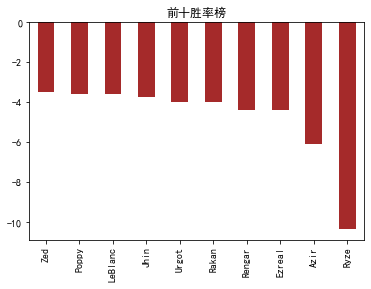

In [20]:
#在百分之50的基础上 后十胜率
(new_df[-10:]["win_rate %"]).plot(kind="bar",color="brown")
k = plt.xticks(new_df[:10].index,labels=new_df[-10:]["name"])
plt.title("前十胜率榜")
new_df[-10:]

        没想到瑞兹的胜率居然是最低的只有(39.65%),而热度挺高的劫胜率居然也只有46.51%，说明英雄关系对游戏输赢占了很大的关系，也许这个版本不适合这几个英雄，需要进一步分析。同时伊泽瑞尔同样作为人气英雄，胜率也只有45.63%。

<AxesSubplot:xlabel='win_rate %', ylabel='name'>

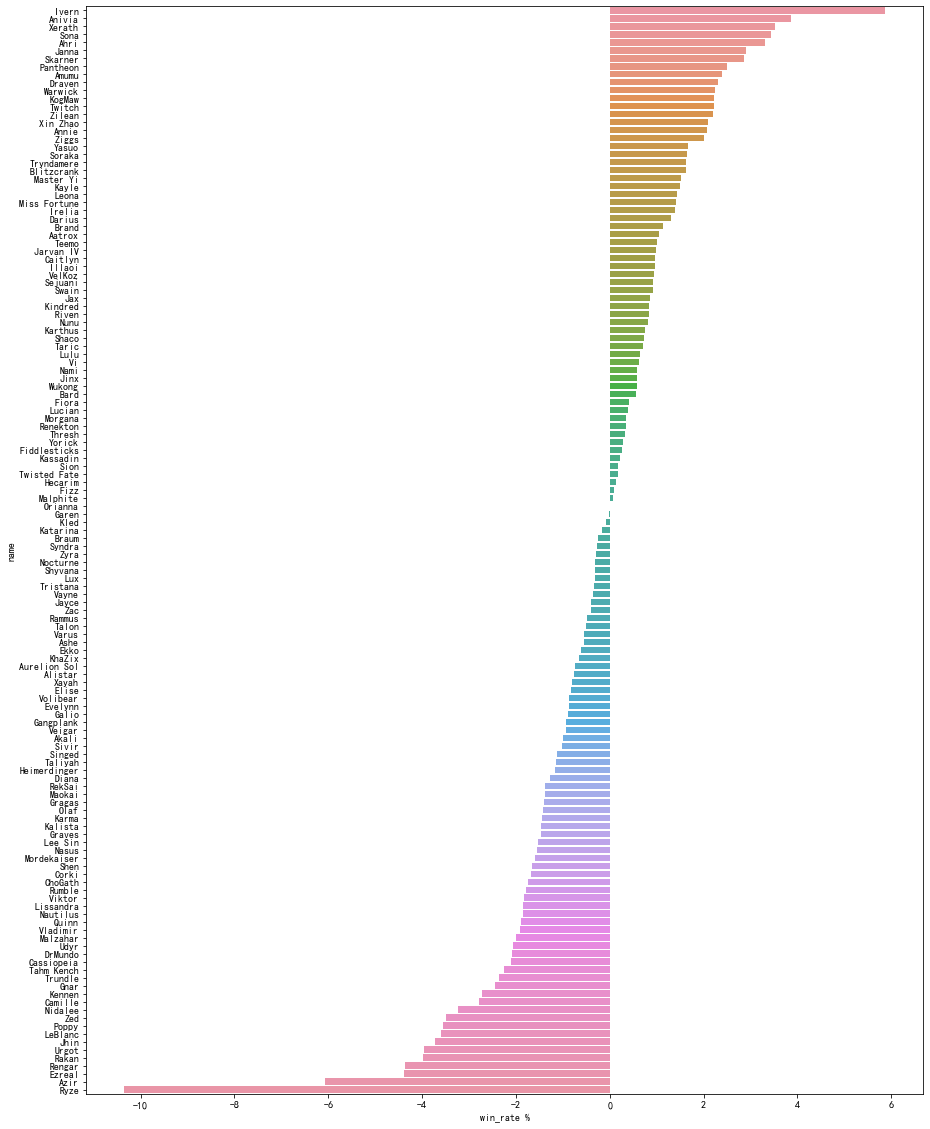

In [21]:
#全部英雄的胜率对比图
plt.figure(figsize=(15,20))
sns.barplot(y="name",x="win_rate %",data=new_df)

<AxesSubplot:xlabel='stander KDA', ylabel='name'>

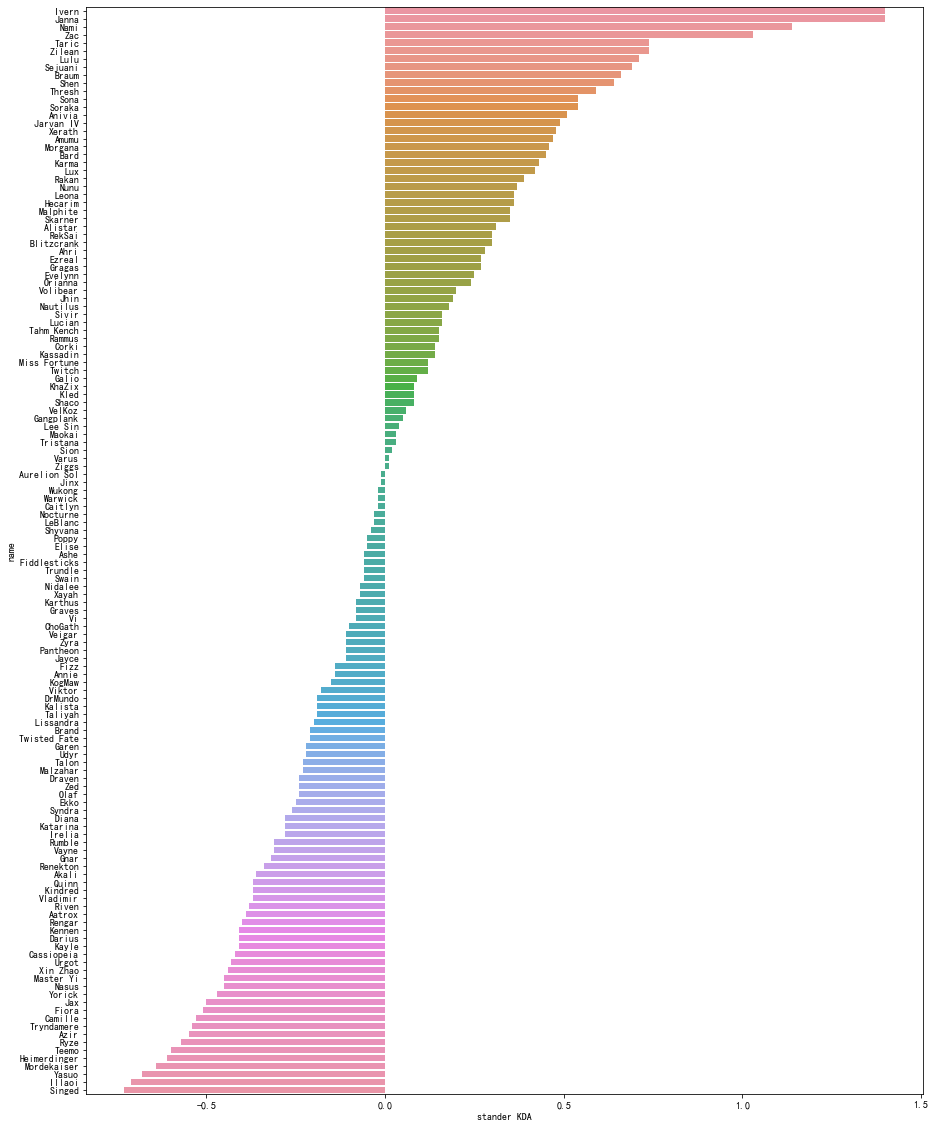

In [22]:
#全部英雄的KDA对比图
plt.figure(figsize=(15,20))
new_df["stander KDA"] = new_df["KDA"] - new_df["KDA"].mean()
sns.barplot(y="name",x="stander KDA",data=new_df.sort_values(by="stander KDA",ascending=False))

        平局的KDA大概是2.4，而最高的翠神差不多有3.9，最低的辛吉德只有1.7左右。前三名里面，有两个都是辅助，而排在头部的，大多是打野或辅助英雄。因为这些英雄在游戏的前期更容易获得助攻而且自保能力往往相对强，而在KDA计算里面击杀和助攻的权重是一样的，因此像射手和法师这类生存能力较弱的英雄往往不容易拿到很高的KDA。
        而最低的KDA给到的是炼金术士-辛吉德，很大部分原因跟这个英雄的玩法有关，很多英雄都是单带英雄基本不参与团战，所以KDA的数据一般都是偏低。
        在观看热度最高的亚索,KDA不高排名倒数第三，但是亚索的胜率还可以，说明亚索被针对性有点高，属于是为队友吸引火力了
       


In [23]:
#分路英雄胜率 我感兴趣的中路和上路

#top 
top_info = df.loc[df["position"] == "TOP" ]

#mid
mid_info = df.loc[df["position"] == "MID" ]


In [24]:
#top
top_hero = top_info.groupby(by="name").agg({"name":"count","win":"sum","kills":"mean","deaths":"mean","assists":"mean"})
#设置新列名
top_hero.columns = ["match_count","win_count","K","D","A"]
#计算英雄胜率
top_hero["win_rate -50 %"] = top_hero["win_count"]/top_hero["match_count"]*100 -50.0
#计算英雄kda
top_hero["KDA"] = (top_hero["K"]+top_hero["A"])/top_hero["D"]
#添加英雄热度
top_hero["choose_rate %"] = top_hero["match_count"]/df["name"].count() * 100 
top_hero["choose_rate %"] = top_hero["choose_rate %"] + ban["name"].value_counts()/ban["name"].count()*100

#设置小数位数
top_hero = top_hero.round(2)
#按照胜率进行排序
top_hero = top_hero.sort_values("win_rate -50 %",ascending=False)
#重新设置索引
top_hero.reset_index(inplace=True)
#这里选取局数大于1000以上的，确保是上路英雄 
top_hero.loc[top_hero["match_count"]>1000][:10]

,name,match_count,win_count,K,D,A,win_rate -50 %,KDA,choose_rate %
13,Pantheon,8032,4265,7.98,6.30,6.30,3.10,2.27,0.77
16,Kayle,3628,1912,5.42,5.98,5.74,2.70,1.87,0.31
17,Yasuo,14617,7700,6.57,7.11,5.03,2.68,1.63,9.70
21,Wukong,3811,1989,7.11,5.83,6.30,2.19,2.30,0.25
22,Teemo,11510,6006,6.17,6.65,5.82,2.18,1.80,1.04
23,Aatrox,2982,1553,6.42,6.02,5.60,2.08,2.00,0.36
24,Tryndamere,12244,6362,6.19,5.78,4.33,1.96,1.82,1.28
25,Swain,4422,2297,5.13,5.52,7.48,1.94,2.29,0.41
28,Irelia,10587,5474,7.07,5.94,5.55,1.70,2.12,0.99
30,Darius,18026,9298,6.75,6.10,5.46,1.58,2.00,6.33


        可以发现上单位置上潘森的胜率是最高的(53.10%)，其次是凯尔(52.7%),排在第三的是亚索(52.68%),猴子排在第四位(52.19%),可爱的提莫排在第五名(52.18%)，俗称小学生之手的诺手，热度很高达到6.33%但是KDA（2.00%）和胜率（51.58%）不是很突出，勉强胜率排在第十。

In [25]:
#mid
mid_hero = mid_info.groupby(by="name").agg({"name":"count","win":"sum","kills":"mean","deaths":"mean","assists":"mean"})
#设置新列名
mid_hero.columns = ["match_count","win_count","K","D","A"]
#计算英雄胜率
mid_hero["win_rate -50 %"] = mid_hero["win_count"]/mid_hero["match_count"]*100 -50.0
#计算英雄kda
mid_hero["KDA"] = (mid_hero["K"]+mid_hero["A"])/mid_hero["D"]
#添加英雄热度
mid_hero["choose_rate %"] = mid_hero["match_count"]/df["name"].count() * 100 
mid_hero["choose_rate %"] = mid_hero["choose_rate %"] + ban["name"].value_counts()/ban["name"].count()*100

#设置小数位数
mid_hero = mid_hero.round(2)
#按照胜率进行排序
mid_hero = mid_hero.sort_values("win_rate -50 %",ascending=False)
#重新设置索引
mid_hero.reset_index(inplace=True)
#这里选取局数大于1000以上的，确保是上路英雄 
mid_hero.loc[mid_hero["match_count"]>1000][:10]

,name,match_count,win_count,K,D,A,win_rate -50 %,KDA,choose_rate %
2,Zilean,1656,910,4.37,4.01,9.50,4.95,3.46,0.12
3,Anivia,6936,3757,6.36,4.59,7.29,4.17,2.97,0.50
4,Xerath,5622,3032,7.23,5.26,8.21,3.93,2.93,0.34
5,Ahri,35966,19239,7.10,5.42,7.50,3.49,2.70,3.85
6,Annie,10524,5621,7.59,6.24,7.17,3.41,2.37,0.95
8,Fiddlesticks,1002,524,6.69,5.83,8.32,2.30,2.58,0.13
9,Ziggs,6717,3506,6.46,5.78,7.63,2.20,2.44,0.41
10,VelKoz,6841,3558,7.15,5.75,7.70,2.01,2.58,0.42
11,Kayle,1627,845,6.11,5.96,6.87,1.94,2.18,0.20
12,Galio,1677,867,5.53,5.79,9.36,1.70,2.57,1.08


        中单排行榜中老头的胜率是最高的居然高达(54.95%),其次是凤凰(54.17%),第三的是艾泽拉斯(53.93%),狐狸的热度和胜率都很高(53.49%),没有看到人气小王子亚索的身影，说明这个赛季亚索主打的位置不是在中路,偏于上路了。前三的KDA和胜率都很高，那时候上分可以用这三个英雄，开发冷门英雄。

In [26]:
#很多时候我们对线会经常选择克制对面的英雄,这是凭经验的出来的，通过数据分析找出克制关系
#设置player队伍Id
def change_teamid(x):
    if x <=5:
        return 100
    else:
        return 200
df["teamid"] = df["player"].apply(change_teamid)

In [27]:
#找出对局人数为10的对局
drop_num = list(((df["matchid"].value_counts() == 10)*(df["matchid"].value_counts() == 10).index).values)
drop_num = list(filter(lambda x : x != 0, drop_num))


In [28]:
#筛选数据
new_df2 = df[df["matchid"].isin(drop_num)]

In [29]:
#去除不需要的列
team = new_df2.drop(columns=["item1","item2","item3","item4","item5","item6","trinket","kills","deaths","assists","largestkillingspree","largestmultikill","killingsprees","longesttimespentliving","doublekills","triplekills","quadrakills","pentakills","legendarykills","totdmgdealt","magicdmgdealt","physicaldmgdealt","truedmgdealt","largestcrit","totdmgtochamp","magicdmgtochamp","physdmgtochamp","truedmgtochamp","totheal","totunitshealed","dmgselfmit","dmgtoobj","dmgtoturrets","visionscore","timecc","totdmgtaken","magicdmgtaken","physdmgtaken","truedmgtaken","goldearned","goldspent","turretkills","inhibkills","totminionskilled","neutralminionskilled","ownjunglekills","enemyjunglekills","totcctimedealt","champlvl","pinksbought","wardsbought","wardsplaced","wardskilled","firstblood","ss1","ss2","id_y","gameid","queueid","player","role","creation","version","id","championid","duration"])
#筛选出对立的两队 
team_blue = team.loc[df["teamid"] == 100]
team_red = team.loc[df["teamid"] == 200].drop(columns=["seasonid","platformid"])

compare_team = team_blue.merge(team_red,left_on=["matchid","position"],right_on=["matchid","position"])

In [30]:
#重新对列进行命名
compare_team.columns = ["blue_statsid","blue_win","matchid","position","platformid","seasonid","blue_hero","blue","red_statsid","red_win","red_hero","red"]

In [31]:
#筛选掉对线位置重复的数据
chongfu = compare_team.groupby(by="matchid").agg({"position":"count"})
save_index = list(((chongfu["position"] == 5).values*(chongfu["position"] == 5).index).values)
save_index = list(filter(lambda x:x !=0,save_index))
compare_team = compare_team[compare_team["matchid"].isin(save_index)]

In [32]:
#删除还具有bot位置的matchid
compare_team["position"].unique()

array(['JUNGLE', 'TOP', 'ADC', 'MID', 'SUP', 'BOT'], dtype=object)

In [33]:
save_index = list(((compare_team["position"] != "BOT").values*(compare_team["position"] != "BOT").index).values)
save_index = list(filter(lambda x:x !=0,save_index))
compare_team = compare_team[compare_team["matchid"].isin(save_index)]

In [34]:
compare_team.reset_index(inplace=True,drop=True)

In [35]:
compare_team

,blue_statsid,blue_win,matchid,position,platformid,seasonid,blue_hero,blue,red_statsid,red_win,red_hero,red
0,9,0,10,JUNGLE,EUW1,8,Warwick,100,14,1,Skarner,200
1,61,1,15,JUNGLE,EUW1,8,Warwick,100,66,0,Lee Sin,200
2,93,0,18,JUNGLE,EUW1,8,Warwick,100,97,1,Lee Sin,200
3,129,1,22,JUNGLE,EUW1,8,Warwick,100,138,0,Sejuani,200
4,139,1,23,JUNGLE,EUW1,8,Warwick,100,145,0,Nunu,200
...,...,...,...,...,...,...,...,...,...,...,...,...
687095,1864376,0,187466,SUP,NA1,7,Corki,100,1864381,1,Lucian,200
687096,1864447,0,187473,SUP,NA1,7,Corki,100,1864454,1,Lucian,200
687097,1864739,0,187502,SUP,NA1,7,Corki,100,1864743,1,Ashe,200
687098,1865138,1,187542,SUP,NA1,7,Corki,100,1865141,0,Draven,200


In [36]:
#进行数据处理 筛选对比位置
choose_road = compare_team.loc[compare_team["position"] == "TOP"]
#设置定义 胜利英雄
def win_list(df):
    if df["blue_win"] == 0:
        return df["blue_hero"]
    else:
        return df["red_hero"]
#设置 失败英雄
def lose_list(df):
    if df["blue_win"] == 0:
        return df["red_hero"]
    else:
        return df["blue_hero"]

#设置 VS 显示
def get_vs(df):
    return "VS".join(sorted([df["win_list"],df["lose_list"]]))

choose_road["win_list"] = choose_road.apply(win_list,axis=1)
choose_road["lose_list"] = choose_road.apply(lose_list,axis=1)
choose_road["hero VS"] = choose_road.apply(get_vs,axis=1)

C:\Users\lly\AppData\Local\Temp\ipykernel_34556\2461179379.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose_road["win_list"] = choose_road.apply(win_list,axis=1)
C:\Users\lly\AppData\Local\Temp\ipykernel_34556\2461179379.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose_road["lose_list"] = choose_road.apply(lose_list,axis=1)
C:\Users\lly\AppData\Local\Temp\ipykernel_34556\2461179379.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [37]:
#是否胜利
def left_win(df):
    if df["win_list"] == df["hero VS"].split('VS')[0]:
        return 1
    else:
        return 0

choose_road["left_win"] = choose_road.apply(left_win,axis=1)

C:\Users\lly\AppData\Local\Temp\ipykernel_34556\3064825274.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose_road["left_win"] = choose_road.apply(left_win,axis=1)


In [38]:
#制作透视表
conqure_info = choose_road.groupby(by='hero VS').agg({"left_win":"sum","win_list":"count"})

In [39]:
#筛选总场数大于100的对线率
conqure_info = conqure_info.loc[conqure_info["win_list"] > 100]

In [40]:
conqure_info

,left_win,win_list
hero VS,,
AatroxVSDarius,54,127
AatroxVSFiora,45,107
AatroxVSRenekton,59,115
AatroxVSRiven,74,128
AatroxVSYasuo,49,106
...,...,...
TryndamereVSYasuo,191,389
TryndamereVSYorick,56,116
VladimirVSYasuo,65,123


In [41]:
conqure_info.columns = ["胜利场数","总场数"]
conqure_info['胜率 %'] =  round(conqure_info["胜利场数"]/ conqure_info["总场数"] * 100,2) 
conqure_info = conqure_info.sort_values("胜率 %",ascending=False)
conqure_info

,胜利场数,总场数,胜率 %
hero VS,,,
ShenVSTeemo,114,173,65.90
SionVSYasuo,69,107,64.49
EkkoVSYasuo,78,121,64.46
NautilusVSYasuo,104,166,62.65
GragasVSYasuo,126,204,61.76
...,...,...,...
DariusVSVladimir,68,171,39.77
DariusVSPoppy,69,180,38.33
DariusVSGragas,104,273,38.10


In [42]:
conqure_info.index

Index(['ShenVSTeemo', 'SionVSYasuo', 'EkkoVSYasuo', 'NautilusVSYasuo',
       'GragasVSYasuo', 'GragasVSTeemo', 'FioraVSSwain', 'CamilleVSYasuo',
       'SwainVSTryndamere', 'ChoGathVSYasuo',
       ...
       'MalphiteVSNasus', 'GangplankVSPoppy', 'GalioVSMalphite',
       'DariusVSNasus', 'PantheonVSShen', 'DariusVSVladimir', 'DariusVSPoppy',
       'DariusVSGragas', 'YasuoVSYorick', 'IreliaVSKennen'],
      dtype='object', name='hero VS', length=362)

<AxesSubplot:xlabel='胜率 %', ylabel='hero VS'>

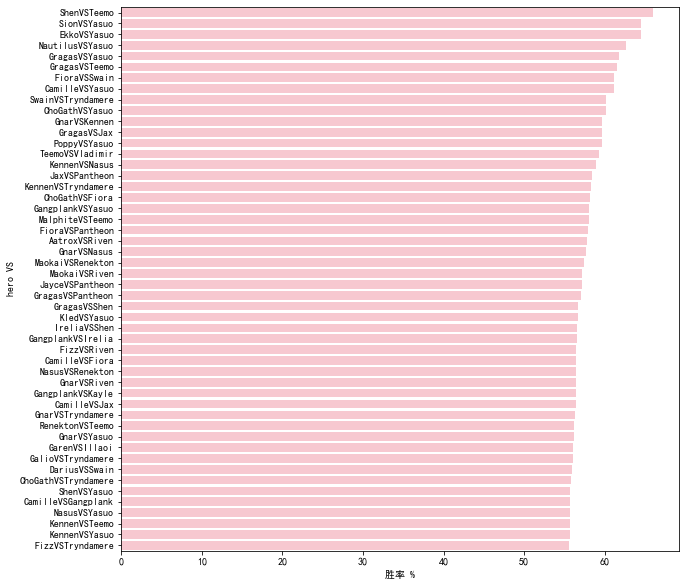

In [43]:
plt.figure(figsize=(10,10))
#选取前五十的对线率 
sns.barplot(x = conqure_info[:50]["胜率 %"],y=conqure_info[:50].index,color='pink')

        从数据上了解上单对线情况，胜率最高对线胜率居然是肾打提莫，胜率足足有65.9%,然后就是我们的亚索大哥，太容易被针对了，塞恩，艾克,泰坦，酒桶打亚索的胜率都特别高

In [44]:
#很好奇打野位盲僧的对位胜率如何（本命英雄）

#进行数据处理 筛选对比位置
choose_road = compare_team.loc[compare_team["position"] == "JUNGLE"]
#设置定义 胜利英雄
def win_list(df):
    if df["blue_win"] == 0:
        return df["blue_hero"]
    else:
        return df["red_hero"]
#设置 失败英雄
def lose_list(df):
    if df["blue_win"] == 0:
        return df["red_hero"]
    else:
        return df["blue_hero"]

#设置 VS 显示
def get_vs(df):
    return "VS".join(sorted([df["win_list"],df["lose_list"]]))

choose_road["win_list"] = choose_road.apply(win_list,axis=1)
choose_road["lose_list"] = choose_road.apply(lose_list,axis=1)
choose_road["hero VS"] = choose_road.apply(get_vs,axis=1)

C:\Users\lly\AppData\Local\Temp\ipykernel_34556\1387745964.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose_road["win_list"] = choose_road.apply(win_list,axis=1)
C:\Users\lly\AppData\Local\Temp\ipykernel_34556\1387745964.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose_road["lose_list"] = choose_road.apply(lose_list,axis=1)
C:\Users\lly\AppData\Local\Temp\ipykernel_34556\1387745964.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [45]:
#是否胜利
def left_win(df):
    if df["win_list"] == df["hero VS"].split('VS')[0]:
        return 1
    else:
        return 0

choose_road["left_win"] = choose_road.apply(left_win,axis=1)

C:\Users\lly\AppData\Local\Temp\ipykernel_34556\3064825274.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose_road["left_win"] = choose_road.apply(left_win,axis=1)


In [46]:
#选取盲僧
mangsen_conqure = choose_road.loc[(choose_road["blue_hero"] == "Lee Sin") | (choose_road["red_hero"] == "Lee Sin")]

In [47]:
mangsen_conqure

,blue_statsid,blue_win,matchid,position,platformid,seasonid,blue_hero,blue,red_statsid,red_win,red_hero,red,win_list,lose_list,hero VS,left_win
1,61,1,15,JUNGLE,EUW1,8,Warwick,100,66,0,Lee Sin,200,Lee Sin,Warwick,Lee SinVSWarwick,1
2,93,0,18,JUNGLE,EUW1,8,Warwick,100,97,1,Lee Sin,200,Warwick,Lee Sin,Lee SinVSWarwick,0
7,212,1,30,JUNGLE,EUW1,8,Warwick,100,216,0,Lee Sin,200,Lee Sin,Warwick,Lee SinVSWarwick,1
20,503,0,59,JUNGLE,EUW1,8,Warwick,100,506,1,Lee Sin,200,Warwick,Lee Sin,Lee SinVSWarwick,0
25,1111,0,120,JUNGLE,EUW1,8,Warwick,100,1114,1,Lee Sin,200,Warwick,Lee Sin,Lee SinVSWarwick,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685778,1456613,1,146476,JUNGLE,EUW1,8,Tahm Kench,100,1456618,0,Lee Sin,200,Lee Sin,Tahm Kench,Lee SinVSTahm Kench,1
685939,1604332,0,161364,JUNGLE,EUW1,8,Tahm Kench,100,1604339,1,Lee Sin,200,Tahm Kench,Lee Sin,Lee SinVSTahm Kench,0
686000,1666370,1,167614,JUNGLE,EUW1,8,Tahm Kench,100,1666372,0,Lee Sin,200,Lee Sin,Tahm Kench,Lee SinVSTahm Kench,1
686001,1668179,1,167795,JUNGLE,EUW1,8,Tahm Kench,100,1668184,0,Lee Sin,200,Lee Sin,Tahm Kench,Lee SinVSTahm Kench,1


In [48]:
#制作透视表
mangsen_conqure = mangsen_conqure.groupby(by='hero VS').agg({"left_win":"sum","win_list":"count"})

In [49]:
#筛选总场数大于100的对线率 
mangsen_conqure = mangsen_conqure.loc[mangsen_conqure["win_list"] > 100]

In [50]:
mangsen_conqure.columns = ["胜利场数","总场数"]
mangsen_conqure['胜率 %'] =  round(mangsen_conqure["胜利场数"]/ mangsen_conqure["总场数"] * 100,2) 
mangsen_conqure = mangsen_conqure.sort_values("胜率 %",ascending=False)
mangsen_conqure

,胜利场数,总场数,胜率 %
hero VS,,,
Lee SinVSNunu,323,573,56.37
EkkoVSLee Sin,128,232,55.17
Lee SinVSWarwick,1270,2326,54.60
Lee SinVSPantheon,184,339,54.28
Lee SinVSShaco,690,1277,54.03
Lee SinVSTryndamere,131,243,53.91
Lee SinVSXin Zhao,869,1625,53.48
Lee SinVSShyvana,305,576,52.95
Lee SinVSNocturne,425,804,52.86


<AxesSubplot:xlabel='胜率 %', ylabel='hero VS'>

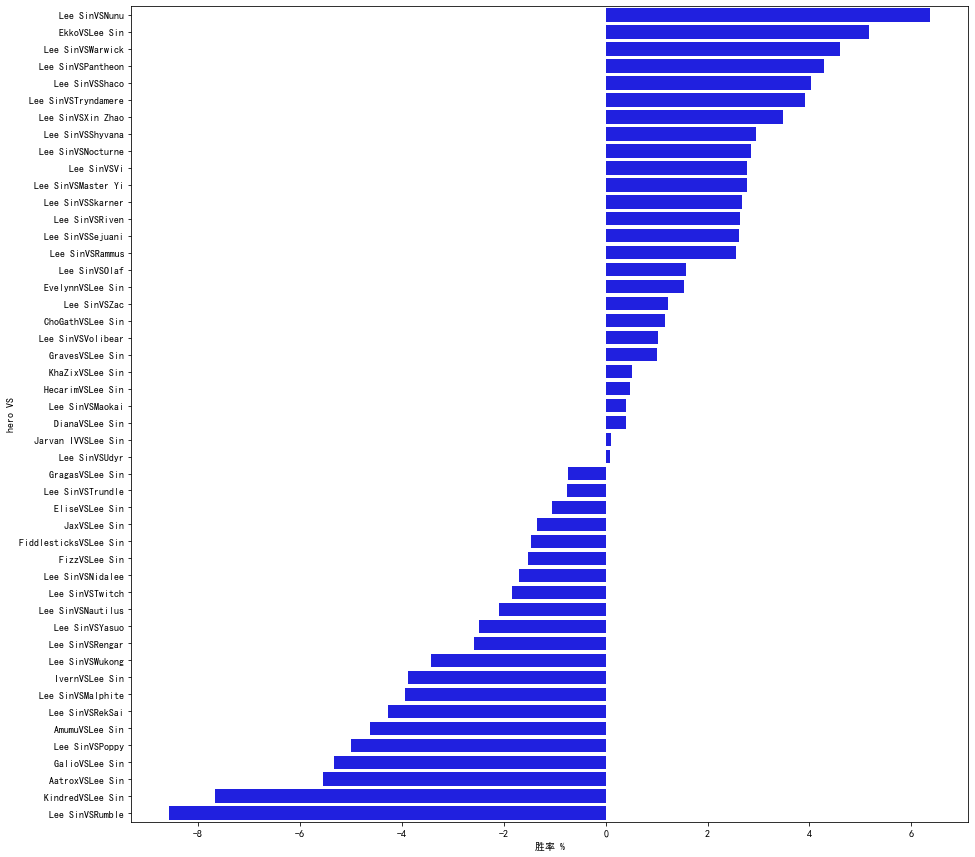

In [51]:
plt.figure(figsize=(15,15))
sns.barplot(x = mangsen_conqure["胜率 %"]- 50,y=mangsen_conqure.index,color='blue')

        发现盲森克制的英雄是努努，被兰博针对最多
        

In [52]:
#接下来分析，游戏中一血，一塔，男爵等因素对胜率的影响
team_stats = pd.read_csv("teamstats.csv")
#游戏时长大于15分钟
new_df2 = new_df2[new_df2["duration"]>=900]
team_info = new_df2[["matchid","win","teamid"]].merge(team_stats,left_on=["matchid","teamid"],right_on=["matchid","teamid"],how="right")

In [53]:
#去重
team_info.drop_duplicates(inplace=True)

In [54]:
#重新设置索引
team_info.reset_index(drop=True,inplace=True)

In [55]:
team_info.head()

,matchid,win,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
0,10,0.0,100,0,1,0,0,0,0,5,0,0,0,0
1,10,1.0,200,1,0,1,1,1,1,10,3,1,3,1
2,11,0.0,100,1,0,0,0,0,0,2,0,0,0,0
3,11,1.0,200,0,1,1,0,1,0,10,3,0,2,0
4,12,0.0,100,1,0,0,0,0,0,1,0,0,0,0


In [56]:
#找出胜利场数
win_count = team_info.loc[(team_info["firstblood"] == 1)]["win"].sum()
#总局数
total_count = team_info["matchid"].count()
win_rate = round(win_count/total_count*2,2)
win_rate

0.57

        拿了一血的胜率有58，对胜率有一定的帮助
     

In [57]:
#一塔胜率
win_count = team_info.loc[(team_info["firsttower"] == 1)]["win"].sum()
#总局数
total_count = team_info["matchid"].count()
win_rate = round(win_count/total_count*2,2)
win_rate

0.68

        没想到一塔的胜率居然这么高，说明这个游戏首要的任务还是以推塔为主，一塔的重要性很大，兄弟们开始偷塔了

In [58]:
#首条男爵胜率
win_count = team_info.loc[(team_info["firstbaron"] == 1)]["win"].sum()
#总局数
total_count = team_info["matchid"].count()
win_rate = round(win_count/total_count*2,2)
win_rate

0.52

        没想到首条男爵的胜率居然只有52%，可能是为了男爵牺牲率有点大，没有足够的数据判断

In [59]:
#首条小龙胜率
win_count = team_info.loc[(team_info["firstdragon"] == 1)]["win"].sum()
#总局数
total_count = team_info["matchid"].count()
win_rate = round(win_count/total_count*2,2)
win_rate

0.65

        自从改版后,小龙的胜率居然达到65%，拿到龙魂之后胜率很高，所以推塔和小龙是需要最先做的
        

In [60]:
#利用决策树训练模型
#整理数据
team_blue = team_info[team_info["teamid"] == 100]
team_red = team_info[team_info["teamid"] == 200]
new_teaminfo = team_blue.merge(team_red,on=["matchid"])

In [61]:
new_teaminfo.head()

,matchid,win_x,teamid_x,firstblood_x,firsttower_x,firstinhib_x,firstbaron_x,firstdragon_x,firstharry_x,towerkills_x,...,firsttower_y,firstinhib_y,firstbaron_y,firstdragon_y,firstharry_y,towerkills_y,inhibkills_y,baronkills_y,dragonkills_y,harrykills_y
0,10,0.0,100,0,1,0,0,0,0,5,...,0,1,1,1,1,10,3,1,3,1
1,11,0.0,100,1,0,0,0,0,0,2,...,1,1,0,1,0,10,3,0,2,0
2,12,0.0,100,1,0,0,0,0,0,1,...,1,1,0,1,0,11,3,0,2,0
3,13,0.0,100,1,1,0,0,1,1,6,...,0,1,1,0,0,9,2,1,2,0
4,14,0.0,100,1,0,0,0,0,1,5,...,1,1,1,1,0,7,1,1,3,0


In [62]:
new_teaminfo["winner"] = new_teaminfo["win_x"].apply(lambda x: 2 if x==0 else 1)
new_teaminfo["firstblood"] = new_teaminfo["firstblood_x"].apply(lambda x: 2 if x==0 else 1)
new_teaminfo["firsttower"] = new_teaminfo["firsttower_x"].apply(lambda x: 2 if x==0 else 1)
new_teaminfo["firstinhib"] = new_teaminfo["firstinhib_x"].apply(lambda x: 2 if x==0 else 1)
new_teaminfo["firstbaron"] = new_teaminfo["firstbaron_x"].apply(lambda x: 2 if x==0 else 1)
new_teaminfo["firstdragon"] = new_teaminfo["firstdragon_x"].apply(lambda x: 2 if x==0 else 1)


In [63]:
new_teaminfo = new_teaminfo[["winner","firstblood","firsttower","firstinhib","firstbaron","firstdragon","towerkills_y","inhibkills_y","baronkills_y","dragonkills_y","towerkills_x","inhibkills_x","baronkills_x","dragonkills_x"]]

In [64]:
new_teaminfo.head()

,winner,firstblood,firsttower,firstinhib,firstbaron,firstdragon,towerkills_y,inhibkills_y,baronkills_y,dragonkills_y,towerkills_x,inhibkills_x,baronkills_x,dragonkills_x
0,2,2,1,2,2,2,10,3,1,3,5,0,0,0
1,2,1,2,2,2,2,10,3,0,2,2,0,0,0
2,2,1,2,2,2,2,11,3,0,2,1,0,0,0
3,2,1,1,2,2,1,9,2,1,2,6,0,0,2
4,2,1,2,2,2,2,7,1,1,3,5,0,0,0


In [65]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#划分训练测试集
x = new_teaminfo.drop("winner",axis=1)
y = new_teaminfo["winner"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [66]:
# 参数 网格搜索

from sklearn.model_selection import GridSearchCV
parameters = {
    'splitter': ('best', 'random'),
    'criterion':('gini', 'entropy'),
    'max_depth':[*range(1, 20,2)],
}
 
# 建立模型
clf = tree.DecisionTreeClassifier(random_state=0)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(X_train, y_train)  

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'splitter': ('best', 'random')})

In [67]:
# 输出最佳得分 
print("best score: ", GS.best_score_)
print("best param: ", GS.best_params_) 

best score:  0.980842753205296
best param:  {'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}


In [68]:
# 最佳模型
best_clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=9, splitter="best")
best_clf.fit(X_train,y_train) 
print("score:", best_clf.score(X_test,y_test))   

score: 0.9806052045417504


In [69]:
# 输出分类报告
y_pred = best_clf.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Classification report : \n', cr)  

Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.98      0.98     19558
           2       0.98      0.98      0.98     17256

    accuracy                           0.98     36814
   macro avg       0.98      0.98      0.98     36814
weighted avg       0.98      0.98      0.98     36814



Text(0.5, 1.0, 'confusion_matrix')

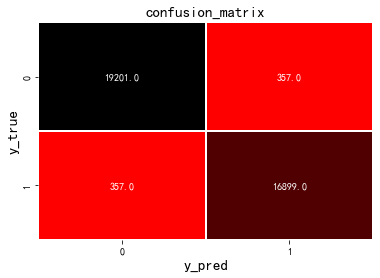

In [70]:
# 热力图
g1 = sns.heatmap(cm, annot=True, fmt=".1f", cmap="flag", linewidths=0.2, cbar=False)
g1.set_ylabel('y_true', fontdict={'fontsize': 15})
g1.set_xlabel('y_pred', fontdict={'fontsize': 15})  
g1.set_title('confusion_matrix', fontdict={'fontsize': 15})  

In [71]:
# 输出属性重要性
imp = pd.DataFrame(list(zip(X_train.columns, best_clf.feature_importances_))) 
imp.columns = ['columns', 'importances']
imp = imp.sort_values('importances', ascending=False)
imp 

,columns,importances
5,towerkills_y,0.808795
9,towerkills_x,0.131038
6,inhibkills_y,0.017932
10,inhibkills_x,0.016802
2,firstinhib,0.009196
8,dragonkills_y,0.006471
12,dragonkills_x,0.003583
7,baronkills_y,0.002345
4,firstdragon,0.001699
1,firsttower,0.001199


        在属性的重要性排序中，击杀防御塔数量的重要性最高，其次是水晶摧毁数量、一水晶、击杀龙的数量。

In [72]:
#可视化
import graphviz
from sklearn import tree 
 
dot_data = tree.export_graphviz(decision_tree=best_clf, max_depth=3,
                                 out_file=None, 
                                 feature_names=X_train.columns,
                                 class_names=['1','2'], 
                                 filled=True,
                                 rounded=True
                                )
graph = graphviz.Source(dot_data)


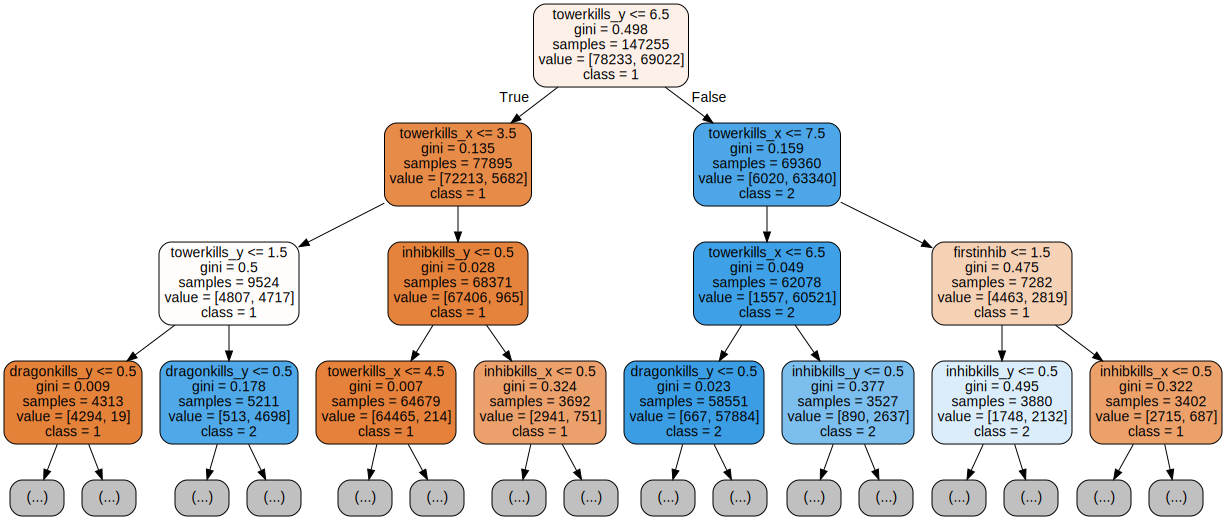

In [75]:
graph

In [76]:
graph.render(view=True, format="pdf", filename="decisiontree_pdf")

'decisiontree_pdf.pdf'

In [74]:
# 新数据
new_data = [[1, 1, 2, 1, 1, 1, 10, 2, 1, 4, 7, 2,1]]
c = best_clf.predict_proba(new_data).reshape(-1, 1) 
print("winner is :" , best_clf.predict(new_data)) 
print("First team win probability is % ", list(c[0] * 100),
      "\nSecond team win probability is %:",list(c[1] * 100)) 

winner is : [1]
First team win probability is %  [81.81818181818183] 
Second team win probability is %: [18.181818181818183]


D:\123\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\123\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


        顺利完成